In [1]:
import math

class Motion:
    '''
    地球上で重力の作用のみを受けた物体の運動を記述するインスタンスをつくる。
    
    Parameters
    ----------
    t0 : 初期時刻
    v0 : 初速度を示す２個の要素のリスト
    r0 : 初期位置を示す２個の要素のリスト
    '''
    def __init__(self, t0, v0, r0):
        self.g = 9.8   #重力加速度
        self.t0 = t0
        self.u0 = v0[0]
        self.w0 = v0[1]
        self.x0 = r0[0]
        self.z0 = r0[1]
        self.tP = self.w0 / self.g + self.t0
        self.tQ = (1/self.g) * (self.w0 + math.sqrt(self.w0**2 + 2 * self.g * self.z0)) + self.t0
        

    def velocity(self, t):
        '''
        Motionインスタンスの，時刻tにおける速度ベクトルを返す。
        
        Parameters
        ----------
        t  : 任意時刻
        '''
        u = self.u0
        w = -self.g * (t - self.t0) + self.w0
        return [u, w]

    
    def position(self, t):
        '''
        Motionインスタンスの，時刻tにおける位置ベクトルを返す。
        
        Parameters
        ----------
        t  : 任意時刻
        '''
        x = self.u0 * (t - self.t0) + self.x0
        z = -(1/2) * self.g * (t - self.t0)**2 + self.w0 * (t - self.t0) + self.z0
        return [x, z]

    
    def observation_time(self):
        '''
        Motionインスタンスの，初期時刻t0から到達時刻tQまでの1ms毎の時刻のリストを返す。
        
        Parameters
        ----------
        t0 : 初期時刻
        v0 : 初速度のx成分とz成分をもつ2要素のリスト
        r0 : 初期位置のx成分とz成分をもつ2要素のリスト
        '''        
        mt0 = int(self.t0 * 1000)
        mtQ = int(self.tQ * 1000)
        t_list = []
        for ms in range(mt0, mtQ+1):
            t_list.append(ms/1000)
        return t_list


    def motion_list(self):
        '''
        初期時刻t0から到達点までの物体の運動の以下のリストを返す：
        Index   物理量
        ------------
          0     初期時刻t0から到達点時刻tQまでの1msec毎の時間リスト
          1     初期時刻t0から到達点時刻tQまでの1msec毎の速度のx成分
          2     初期時刻t0から到達点時刻tQまでの1msec毎の速度のz成分
          3     初期時刻t0から到達点時刻tQまでの1msec毎の位置のx成分
          4     初期時刻t0から到達点時刻tQまでの1msec毎の位置のz成分
          
        '''
        t_list = self.observation_time()
        u_list = []
        w_list = []
        x_list = []
        z_list = []
        for sec in t_list:
            u_list.append(self.velocity(sec)[0])
            w_list.append(self.velocity(sec)[1])
            x_list.append(self.position(sec)[0])
            z_list.append(self.position(sec)[1])
        return [t_list, u_list, w_list, x_list, z_list]

In [2]:
mot0 = Motion(7/math.sqrt(2), [21, 7*math.sqrt(2)], [15, 10])

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

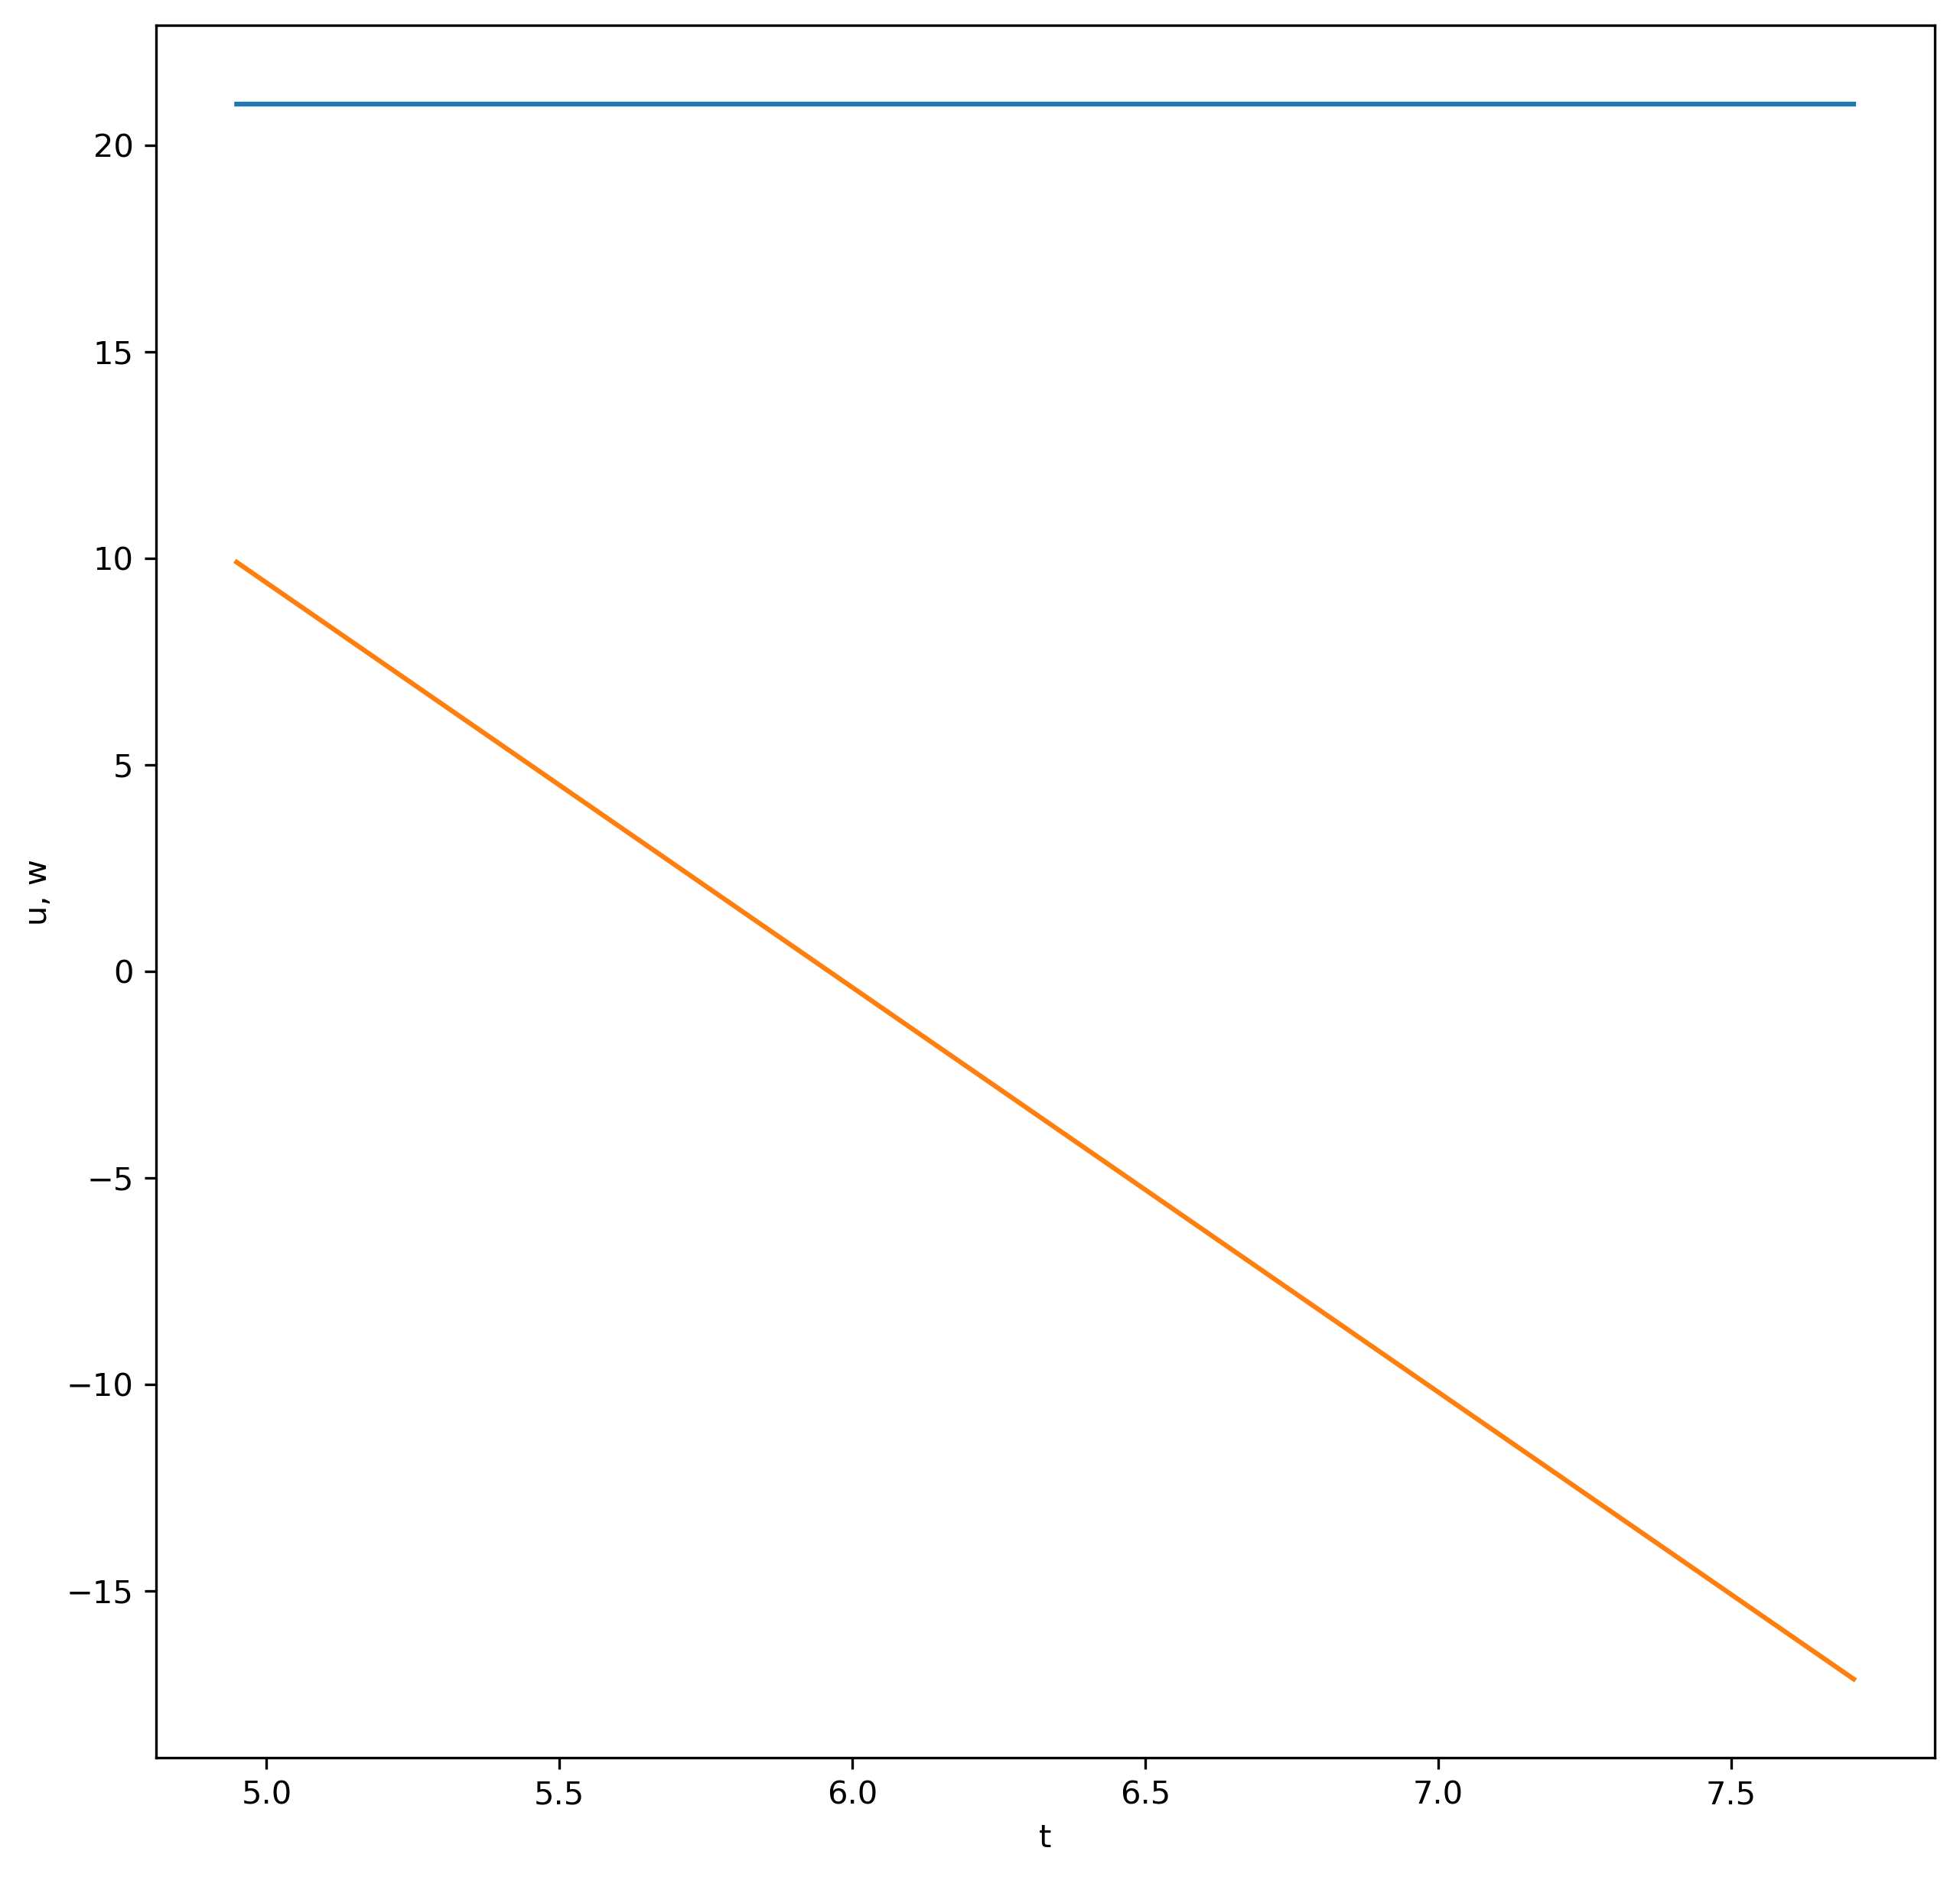

In [4]:
plt.figure(figsize=(10,10),dpi=300)
plt.plot(mot0.motion_list()[0], mot0.motion_list()[1])
plt.plot(mot0.motion_list()[0], mot0.motion_list()[2])
plt.xlabel('t')
plt.ylabel('u, w')
plt.show()

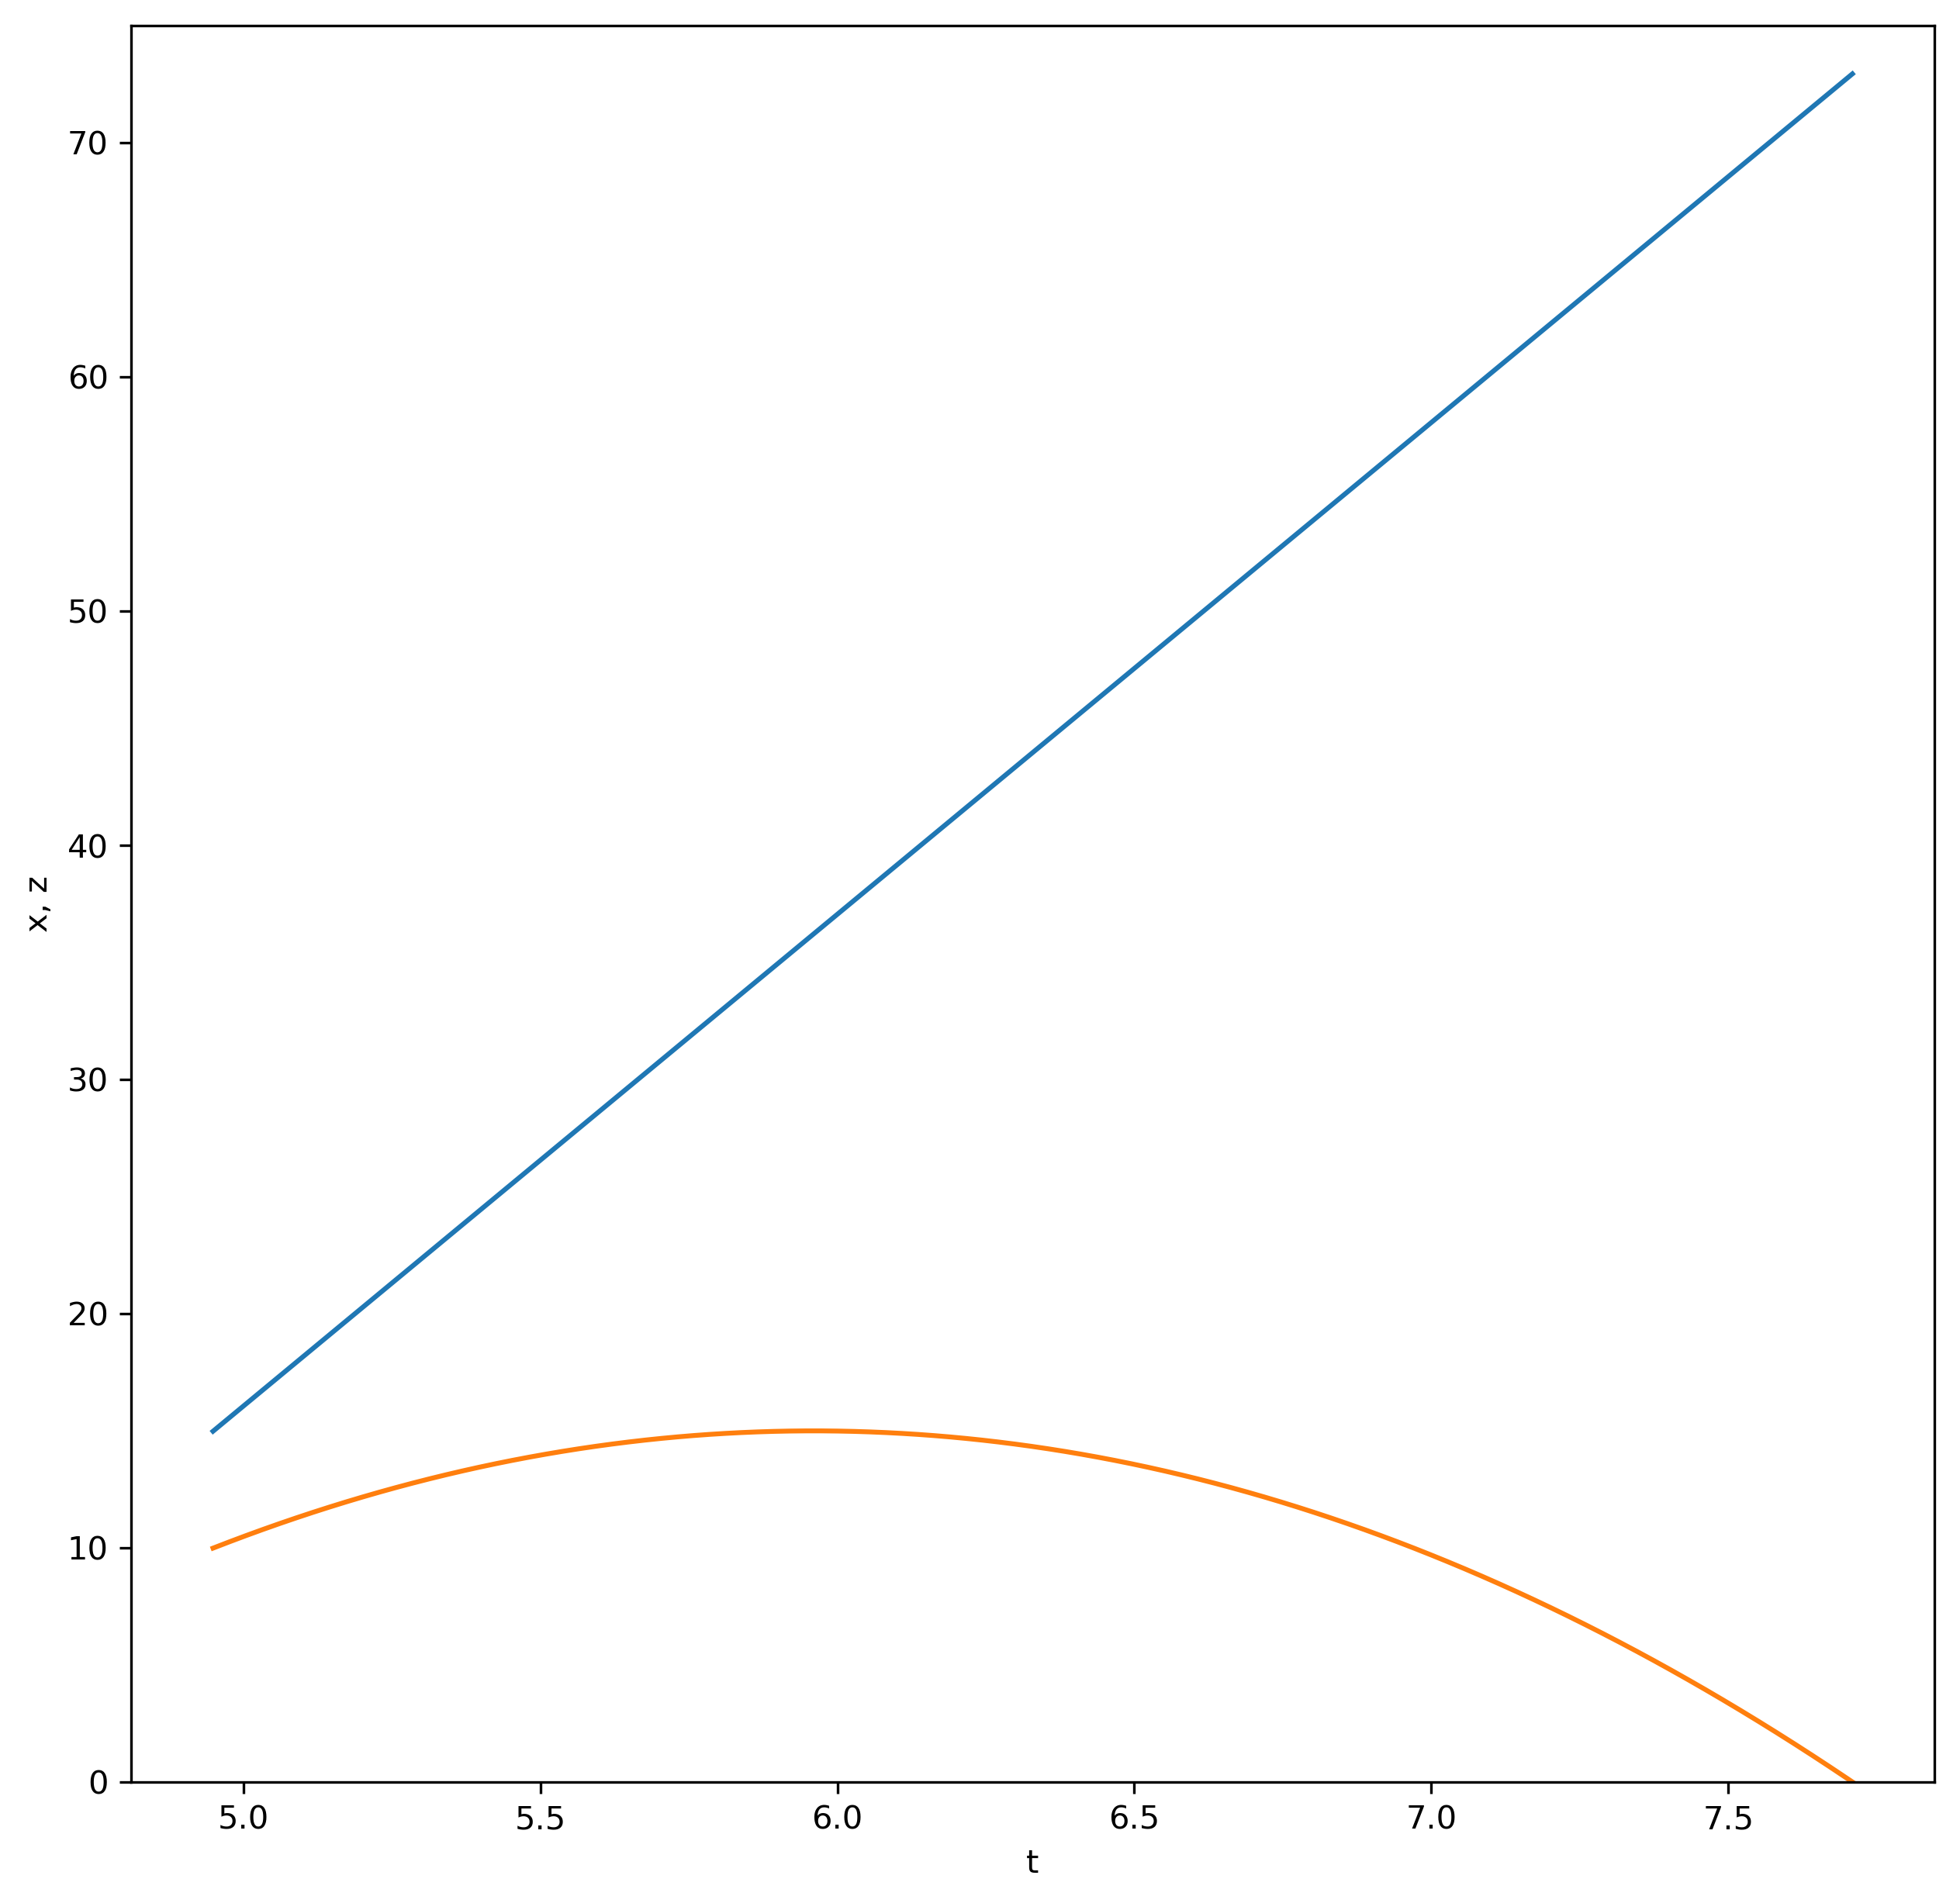

In [5]:
plt.figure(figsize=(10,10),dpi=300)
plt.plot(mot0.motion_list()[0], mot0.motion_list()[3])
plt.plot(mot0.motion_list()[0], mot0.motion_list()[4])
plt.ylim(0,75)
plt.xlabel('t')
plt.ylabel('x, z')
plt.show()

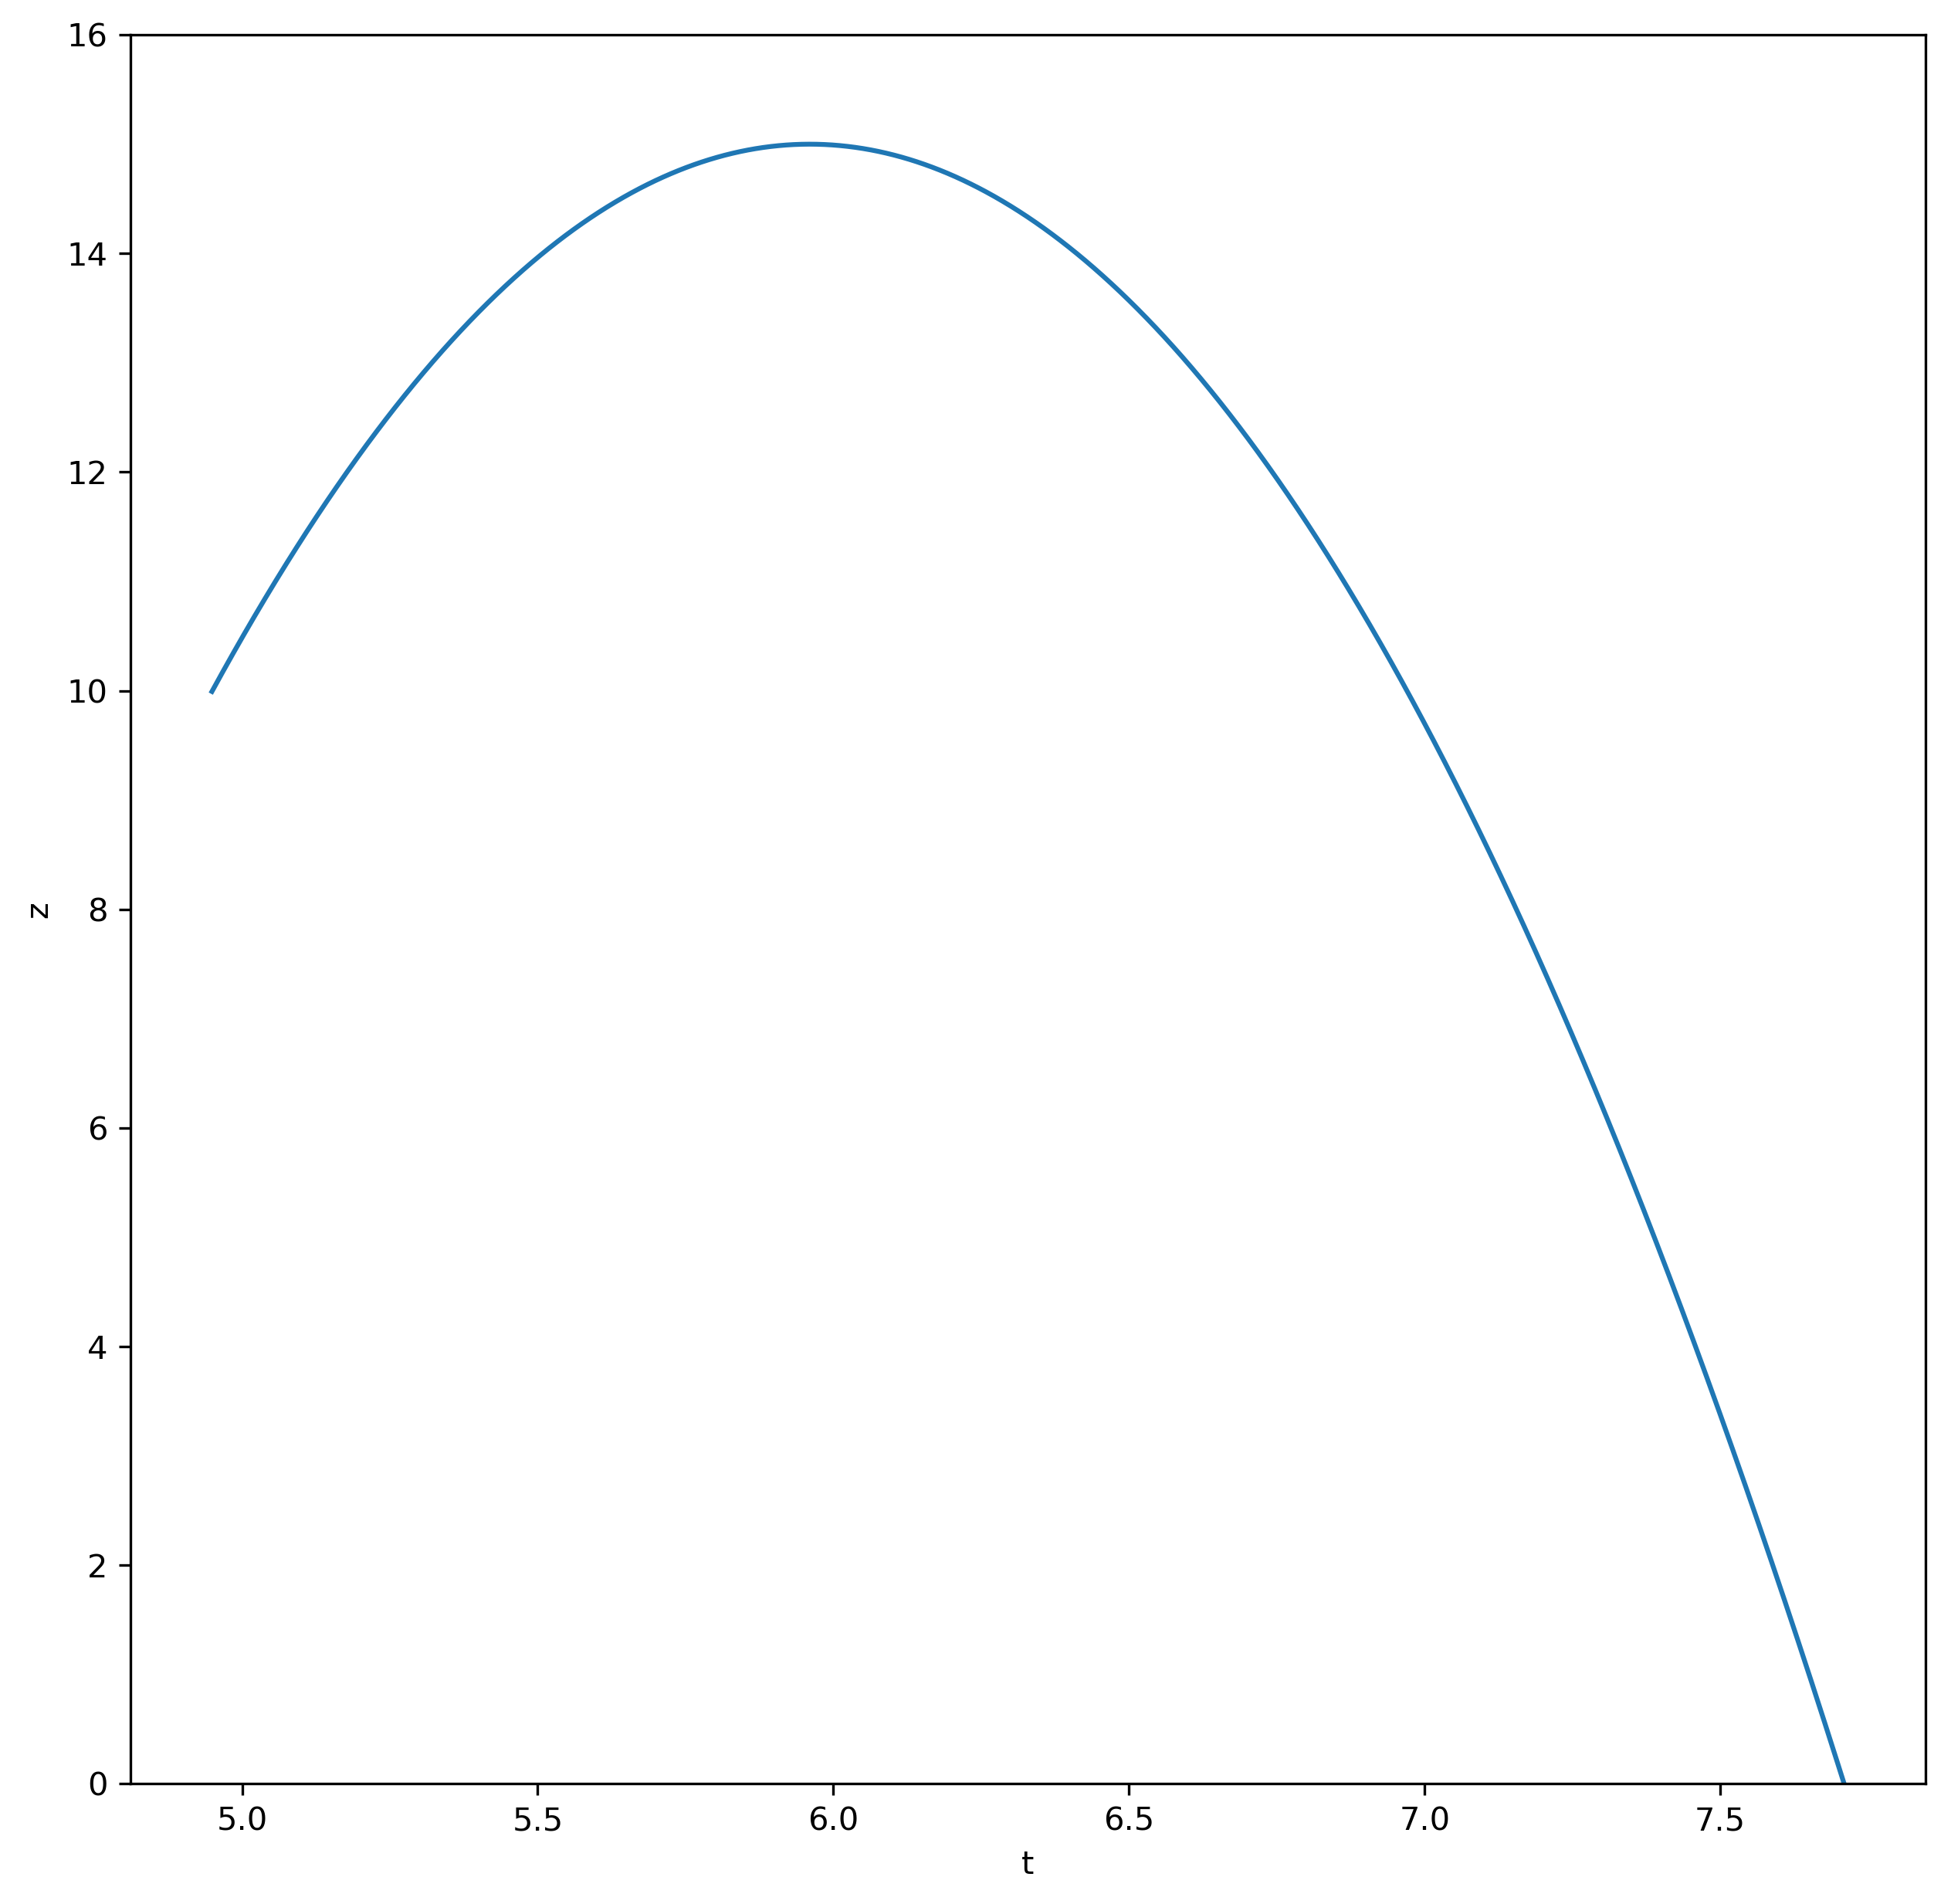

In [6]:
plt.figure(figsize=(10,10),dpi=300)
plt.plot(mot0.motion_list()[0], mot0.motion_list()[4])
plt.ylim(0,16)
plt.xlabel('t')
plt.ylabel('z')
plt.show()

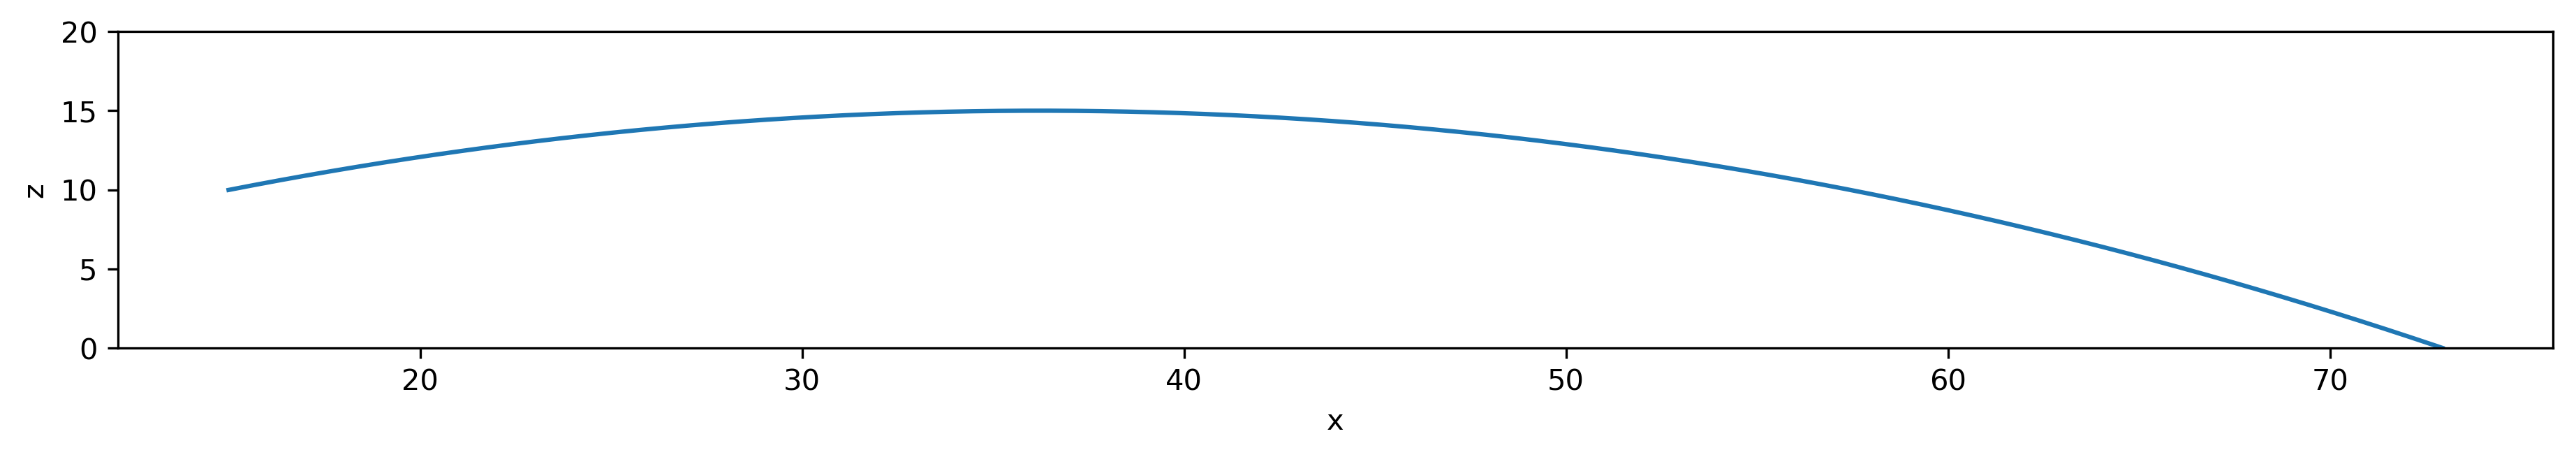

In [7]:
plt.figure(figsize=(15,2),dpi=300)
plt.plot(mot0.motion_list()[3], mot0.motion_list()[4])
plt.ylim(0,20)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

In [8]:
print(f'最高点の時刻: {mot0.tP}(sec)\n\
最高点の速度: {mot0.velocity(mot0.tP)}(m/s)\n\
最高点　　　: {mot0.position(mot0.tP)}(m)')

最高点の時刻: 5.959900012858043(sec)
最高点の速度: [21, 5.329070518200751e-15](m/s)
最高点　　　: [36.21320343559641, 15.0](m)


In [9]:
print(f'到達点の時刻: {mot0.tQ}(sec)\n\
到達点の速度: {mot0.velocity(mot0.tQ)}(m/s)\n\
到達点　　　: {mot0.position(mot0.tQ)}(m)')

到達点の時刻: 7.709535543417456(sec)
到達点の速度: [21, -17.146428199482244](m/s)
到達点　　　: [72.95554957734409, 1.0658141036401503e-14](m)
